In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import numpy.ma as ma

from hbmep.config import Config
from hbmep.model.utils import Site as site

from models import NonHierarchicalBayesianModel
from constants import (
    DATA_PATH,
    TOML_PATH
)

from sklearn.decomposition import PCA


In [78]:
src = "/home/andres/repos/rat-mapping-paper/notebooks/J_RCML_000/selectivity_means.pkl"
with open(src, "rb") as f:
    cath_mid_list, cath_lat_list, mid_mid_list, lat_lat_list, mid_lat_list = pickle.load(f)

In [3]:
src = f"/home/andres/repos/rat-mapping-paper/reports/non-hierarchical/J_RCML_000/non_hierarchical_bayesian_model/inference.pkl"
with open(src, "rb") as f:
    (
        df,
        encoder_dict,
        model,
        posterior_samples,
    ) = pickle.load(f)
    

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [58]:
named_params = [site.a, site.b, site.L, site.ell, site.H]
params = [posterior_samples[param][ ...] for param in named_params]

a = params[0]

In [5]:
positions = encoder_dict[model.features[1]].inverse_transform(df.compound_position.unique())


In [65]:
cath_mid = [(i, cpos) for i, cpos in enumerate(positions) if cpos.split("-")[1][-1] == "M" and cpos.split("-")[0] == ""]
cath_lat = [(i, cpos) for i, cpos in enumerate(positions) if cpos.split("-")[1][-1] == "L" and cpos.split("-")[0] == ""]

mid_mid = [(i, cpos) for i, cpos in enumerate(positions) if cpos.split("-")[1][-1] == "M" and cpos.split("-")[0] != "" and cpos.split("-")[0][-1] == "M"]
lat_lat = [(i, cpos) for i, cpos in enumerate(positions) if cpos.split("-")[1][-1] == "L" and cpos.split("-")[0] != "" and cpos.split("-")[0][-1] == "L"]
mid_lat = [(i, cpos) for i, cpos in enumerate(positions) if cpos.split("-")[1][-1] == "L" and cpos.split("-")[0] != "" and cpos.split("-")[0][-1] == "M"]

cath_mid = [i for (i, cpos) in cath_mid]
cath_lat = [i for (i, cpos) in cath_lat]
mid_mid = [i for (i, cpos) in mid_mid]
lat_lat = [i for (i, cpos) in lat_lat]
mid_lat = [i for (i, cpos) in mid_lat]

In [59]:
a = a/np.nanmedian(a, axis = (1,2,3), keepdims=True)

In [60]:
a.shape

(4000, 8, 21, 6)

In [107]:
a_cath_mid = a[:,:, cath_mid, :]
a_cath_lat = a[:,:, cath_lat, :]
a_mid_mid = a[:,:, mid_mid, :]
a_lat_lat = a[:,:, lat_lat, :]
a_mid_lat = a[:,:, mid_lat, :]

In [103]:
a_cath_mid.shape

(4000, 8, 4, 6)

In [108]:
a_cath_mid = np.nanmean(a_cath_mid, axis = (0,3))
a_cath_lat = np.nanmean(a_cath_lat, axis = (0,3))
a_mid_mid = np.nanmean(a_mid_mid, axis = (0,3))
a_lat_lat = np.nanmean(a_lat_lat, axis = (0,3))
a_mid_lat = np.nanmean(a_mid_lat, axis = (0,3))

/tmp/ipykernel_1884376/1915660067.py:1: RuntimeWarning: Mean of empty slice
  a_cath_mid = np.nanmean(a_cath_mid, axis = (0,3))
/tmp/ipykernel_1884376/1915660067.py:2: RuntimeWarning: Mean of empty slice
  a_cath_lat = np.nanmean(a_cath_lat, axis = (0,3))
/tmp/ipykernel_1884376/1915660067.py:3: RuntimeWarning: Mean of empty slice
  a_mid_mid = np.nanmean(a_mid_mid, axis = (0,3))
/tmp/ipykernel_1884376/1915660067.py:4: RuntimeWarning: Mean of empty slice
  a_lat_lat = np.nanmean(a_lat_lat, axis = (0,3))
/tmp/ipykernel_1884376/1915660067.py:5: RuntimeWarning: Mean of empty slice
  a_mid_lat = np.nanmean(a_mid_lat, axis = (0,3))


In [109]:
a_cath_mid.shape

(8, 4)

In [110]:
a_cath_mid_mean = np.nanmean(a_cath_mid, axis = (0,1))
a_cath_lat_mean = np.nanmean(a_cath_lat, axis = (0,1))
a_mid_mid_mean = np.nanmean(a_mid_mid, axis = (0,1))
a_lat_lat_mean = np.nanmean(a_lat_lat, axis = (0,1))
a_mid_lat_mean = np.nanmean(a_mid_lat, axis = (0,1))

In [111]:
mean_list = np.array([a_cath_mid_mean, a_cath_lat_mean, a_mid_mid_mean, a_lat_lat_mean, a_mid_lat_mean])


In [113]:
mean_list

array([1.92383715, 1.65104702, 2.01514246, 1.29877509, 2.19562651])

In [116]:
cath_mid_list = cath_mid_list/ma.median(cath_mid_list, axis = -1, keepdims = True)
cath_lat_list = cath_lat_list/ma.median(cath_lat_list, axis = -1, keepdims = True)
mid_mid_list = mid_mid_list/ma.median(mid_mid_list, axis = -1, keepdims = True)
lat_lat_list = lat_lat_list/ma.median(lat_lat_list, axis = -1, keepdims = True)
mid_lat_list = mid_lat_list/ma.median(mid_lat_list, axis = -1, keepdims = True)

In [117]:
cath_mid_list.shape

(8, 4)

In [118]:
avg_sel_cath_mid = np.nanmean(cath_mid_list, axis = (0,1))
avg_sel_cath_lat = np.nanmean(cath_lat_list, axis = (0,1))
avg_sel_mid_mid = np.nanmean(mid_mid_list, axis = (0,1))
avg_sel_lat_lat = np.nanmean(lat_lat_list, axis = (0,1))
avg_sel_mid_lat = np.nanmean(mid_lat_list, axis = (0,1))
avg_sel = np.array([avg_sel_cath_mid, avg_sel_cath_lat, avg_sel_mid_mid, avg_sel_lat_lat, avg_sel_mid_lat])

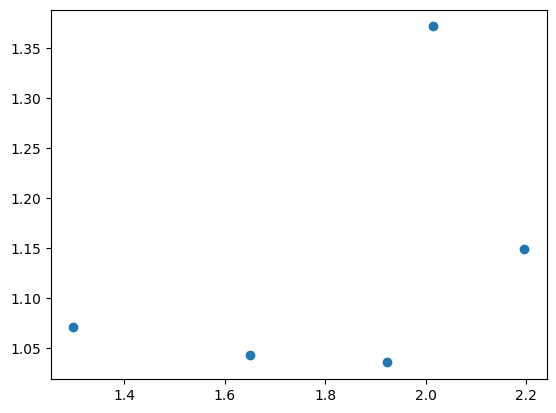

In [119]:
plt.scatter(x = mean_list, y = avg_sel)